# 3.2 Factor analysis

---
> Erick Eduardo Aguilar Hernández:
> * mat.ErickAguilar@gmail.com.mx
> * isc.ErickAguilar@gmail.com

---

Some timed is not possible to measure directly the concepts of primary interest however it is possible to observe its effect on observable variables. Factor analysis is a multivariate technique applied to a set of observed variables that seeks to find underlying factors (subsets of variables) from which the observed variables were generated. Factor analysis is carried out on the correlation matrix of the observed variables. A factor is a weighted average of
the original variables. The factor analyst hopes to find a few factors from which the original correlation matrix
may be generated.

The basis of factor analysis is a regression model linking the manifest variables to a set of unobserved (and unobservable) latent variables. In essence the model assumes that the observed relationships between the manifest variables (as measured by their covariances or correlations) are a result of the relationships of these variables to the latent variables. (Since it is the covariances or correlations of the manifest variables that are central to factor analysis, we can, **in the description of the mathematics of the method given below, assume that the manifest variables all have zero mean**.

Lets the **observable random vector** $\mathbf{x} \in \mathbb{R^p}$ the factor model postulates that $\mathbf{x}$ is linearly dependent upon a few unobervable random variables $F_1,\dots,F_m$ called common factors, and p adition sources of deviation $\varepsilon_1,\dots,\varepsilon_p$ called specific factors, this specific factors is asociated with only one , this model can be expressed as equation system.

$$
\begin{align*}
X_1 &= \ell_{11} F_1 + \ell_{12} F_2 +\dots + \ell_{1m} F_m+\varepsilon_1\\
\vdots &= \vdots \\
X_p &= \ell_{p1} F_1 + \ell_{p2} F_2 +\dots + \ell_{pm} F_m+\varepsilon_p\\
\\
\left[ \begin{array}{ccccc}
X_{1} \\
\vdots  \\
X_{p} \end{array} \right]
& = 
\left[ \begin{array}{ccccc}
\ell_{1 1} & \cdots & \ell_{1 m} \\
\vdots  & \ddots & \vdots \\
\ell_{p 1} & \cdots & \ell_{p m} \end{array} \right]
\left[ \begin{array}{ccccc}
F_{1} \\
\vdots \\
F_{p} \end{array} \right]
+
\left[ \begin{array}{ccccc}
\varepsilon_{1} \\
\vdots  \\
\varepsilon_{p} \end{array} \right]\\
\\
\textbf{x} & =\textbf{LF}+\mathbf{\epsilon}\\
\end{align*}
$$

The coeficient matrix $\mathbf{L}$ is called matrix of factor loadings, some assumptions for the model are as follows:
 * $E[\mathbf{F}]=0$
 * $E[\mathbf{\epsilon}]=0$
 * $Cov[\mathbf{\epsilon}]=E[\mathbf{\epsilon \epsilon'}]=\mathbf{\Psi}=diag(\Psi_1,\dots,\Psi_p)$
 * Ortogonality in factors: $Cov[\mathbf{F}]=E[\mathbf{FF'}]=\mathbf{I_m}$
 * $\mathbf{F}$ and $\mathbf{\epsilon}$ are independent: $Cov[\mathbf{\epsilon,F}]=E[\mathbf{\epsilon F'}]=0$

Examining implications of model assumptions:

$$
\begin{align*}
V[Y_i] &= \ell_{i1}^2 V[F_1 ]+ \ell_{i2}^2 V[F_2] +\dots + \ell_{im}^2 V[F_m]+V[\varepsilon_i]\\
&=\underset{communalities}{\underbrace{\ell_{11}^2+\ell_{12}^2+\dots+\ell_{1m}^2}}+\underset{specific variance}{\underbrace{\sigma^2}}
\end{align*}
$$

This model is knowed as ortogonal factor model, and implies covariance structure for $\mathbf{x}$.

$$
\begin{align*}
\mathbf{\Sigma}&= E[\mathbf{xx'}] \\
&= E[(\textbf{LF}+\mathbf{\epsilon})(\textbf{LF}+\mathbf{\epsilon})']\\
&= E[(\textbf{LF}+\mathbf{\epsilon})((\textbf{LF})'+\mathbf{\epsilon}')]\\
&= E[\textbf{LF}(\textbf{LF})'+\mathbf{\epsilon}(\textbf{LF})'+\textbf{LF}\mathbf{\epsilon}'+\mathbf{\epsilon}\mathbf{\epsilon}']\\
&= E[\textbf{LF}(\textbf{LF})']+E[\mathbf{\epsilon}(\textbf{LF})']+E[\textbf{LF}\mathbf{\epsilon}']+E[\mathbf{\epsilon}\mathbf{\epsilon}']\\
&= E[\textbf{LFF'L}]+E[\mathbf{\epsilon F'L'}]+E[\textbf{LF}\mathbf{\epsilon}']+E[\mathbf{\epsilon}\mathbf{\epsilon}']\\
&= \textbf{L}E[\textbf{FF'}]\textbf{L'}+E[\mathbf{\epsilon F'}]\textbf{L'}+\textbf{L'}E[\textbf{F}\mathbf{\epsilon}']+E[\mathbf{\epsilon}\mathbf{\epsilon}']\\
\mathbf{\Sigma}&= \textbf{LL'}+\mathbf{\Psi}\\
\implies \mathbf{\Psi}&=\textbf{LL'}-\mathbf{\Sigma}&
\end{align*}
$$

### The principal compent method
___

From the scpetral descomposition of $\mathbf{\Sigma}$ it's possible aproximate $\mathbf{LL'}$:

$$
\begin{align*}
\Sigma&=\left[\sum_{k=1}^p\lambda_k\mathbf{\gamma_k'\gamma_k}\right]\\
&\simeq\left[\sum_{k=1}^m\lambda_k\mathbf{\gamma_k'\gamma_k}\right]\\
&=\left[\sqrt{\lambda_1} \mathbf{\gamma_1} \dots \sqrt{\lambda_1} \mathbf{\gamma_p} \right]
\left[ \begin{array}{ccccc}
\sqrt{\lambda_1} \mathbf{\gamma_1} \\
\vdots  \\
\sqrt{\lambda_1} \mathbf{\gamma_p}\end{array} \right]\\
&=\mathbf{L L'}\\
\end{align*}
$$

This in turn suggests that the specific variances, which are the diagonal elements of this matrix $\mathbf{\Psi}$, can be estimated using this expression:

$$
\psi_i = \sigma_i^2 - \sum_{k=1}^{m} \lambda_k \gamma_{ki}^2\\
$$

It's possible estimates $\phi_i$ taking the sample variance for the ith variable and subtract from that, the sum of the squared factor loadings (i.e., the ith communality).
___

**Example 3.2 - 1 [Factor analysis of places rated data]**

The "places data" were distributed to interested ASA members a few years ago so that they could apply contemporary data analytic methods to describe these data and then present results in a poster session at the ASA annual conference.  The nine rating criteria used by Places Rated Almanac are: Climate and Terrain, Housing, Health Care and Environment, Crime, Transportation, Education, The Arts, Recreation, Economics.

For all but two of the above criteria, the higher the score, the better. For Housing and Crime, the lower the score the better. The scores are computed using the following component statistics for each criterion:

* Climate and Terrain: very hot and very cold months, seasonal temperature variation, heating- and cooling-degree days, freezing days, zero-degree days, ninety-degree days.

* Housing: utility bills, property taxes, mortgage payments.

* Health Care and Environment: per capita physicians, teaching hospitals, medical schools, cardiac rehabilitation centers, comprehensive cancer treatment centers, hospices, insurance/hospitalization costs index, fluoridation of drinking water, air pollution.

* Crime: violent crime rate, property crime rate.

* Transportation: daily commute, public transportation, Interstate highways, air service, passenger rail service.

* Education: pupil/teacher ratio in the public K-12 system, effort index in K-12, academic options in higher education.

* The Arts: museums, fine arts and public radio stations, public television stations, universities offering a degree or degrees in the arts, symphony orchestras, theatres, opera companies, dance companies, public libraries.

* Recreation: good restaurants, public golf courses, certified lanes for tenpin bowling, movie theatres, zoos, aquariums, etc.

* Economics: average household income adjusted for taxes and living costs, income growth, job growth.

___
Loading some functions and packages

In [1]:
run MvaUtils.py

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math as mt 
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql.functions import col as c
from pyspark.mllib.linalg.distributed import RowMatrix
pd.set_option('max_colwidth',100)
plt.style.use('seaborn-paper')

In [3]:
try:
    sc = SparkContext('local[*]')
except:
    sc = SparkContext.getOrCreate('local[*]')
sqlContext = SQLContext(sc)

Data loading and normalization using logarithm.

In [4]:
idCol = ['City']
features = ['Climate','HousingCost','HlthCare','Crime',\
            'Transp','Educ','Arts','Recreat','Econ']
p=len(features)
ratedPlacesDatasetPath = 'DataSets/PlacesRated.csv'
placesRatedDF = sqlContext.read.format('com.databricks.spark.csv')\
                          .options(header='true',inferschema='true')\
                          .load(ratedPlacesDatasetPath).select(idCol+features)\
                          .rdd.map(lambda r: ((r[0]),)+tuple([mt.log10(v) for v in r[1:p+1]]))\
                          .toDF(idCol+features)
placesRatedDF.limit(5).toPandas()

,City,Climate,HousingCost,HlthCare,Crime,Transp,Educ,Arts,Recreat,Econ
0,Abilene,2.716838,3.792392,2.374748,2.965202,3.605413,3.440437,2.998259,3.147676,3.882695
1,Akron,2.759668,3.910518,3.219060,2.947434,3.688687,3.387034,3.745387,3.420286,3.638489
2,Albany,2.670246,3.865637,2.790988,2.986772,3.403292,3.408240,2.374748,2.933993,3.720159
3,Albany-Schenectady-Troy,2.677607,3.898067,3.155640,2.785330,3.837778,3.531351,3.667920,3.208710,3.768194
4,Albuquerque,2.818885,3.923917,3.267875,3.171141,3.816771,3.480869,3.652826,3.416973,3.757927


**Note:** 
> The results of the analysis will depend on what units of measurement are used to measure each variable. That would imply that a principal component method should only be used with the raw data if all variables have the same units of measure. If the variables either have different units of measurement, or if we wish each variable to receive equal weight in the analysis, then the variables should be standardized before a principal component method is carried out. Standardize the variables by subtracting its mean from that variable and dividing it by its standard deviation

Standardizing the measures

In [5]:
import pyspark.sql.functions as f
aggExpresions = [f.mean(c(colName)).alias('mean'+colName) for colName in features]+\
                [f.stddev(c(colName)).alias('stddev'+colName) for colName in features]
statisticsDF = placesRatedDF.select(aggExpresions)

In [6]:
stdExpresions = [((c(colName)-c('mean'+colName))/c('stddev'+colName))\
                 .alias('std'+colName) for colName in features]
sdPlatecRated = placesRatedDF.crossJoin(f.broadcast(statisticsDF))\
                             .select([c(idCol[0])]+stdExpresions)
sdPlatecRated.limit(5).toPandas()

,City,stdClimate,stdHousingCost,stdHlthCare,stdCrime,stdTransp,stdEduc,stdArts,stdRecreat,stdEcon
0,Abilene,-0.014588,-1.091682,-1.811908,0.080253,0.052110,-0.122905,-0.381465,-0.419848,1.758009
1,Akron,0.362622,0.028706,0.822352,-0.024791,0.580593,-1.186725,0.989070,1.030945,-1.132754
2,Albany,-0.424928,-0.396975,-0.513235,0.207776,-1.230611,-0.764284,-1.525236,-1.557043,-0.165994
3,Albany-Schenectady-Troy,-0.360098,-0.089388,0.624479,-0.983152,1.526771,1.688161,0.846964,-0.095034,0.402612
4,Albuquerque,0.884158,0.155796,0.974656,1.297771,1.393458,0.682526,0.819276,1.013316,0.281080


Computing the maximum likehood estimators

In [7]:
stdFeatures = ['std'+colName for colName in features]
mean, sigma = computeMaximumLikelihoodEstimators(sdPlatecRated.select(stdFeatures))
eigenValues, eigenVectors = diagonalize(sigma)
sqrtLambda = np.diag([mt.sqrt(Lambda) for Lambda in eigenValues])

Computing overall variability measure

In [8]:
explainedVar = [Lambda/sum(eigenValues) for Lambda in eigenValues]
cumulativeExplainedVar = np.cumsum(explainedVar)
eigenvaluesResumePD = pd.DataFrame(np.matrix([eigenValues.tolist(),explainedVar,\
                              cumulativeExplainedVar.tolist()]).transpose(),\
                              columns=['eigenvalue','explained_var','cumulaitve_var'])
eigenvaluesResumePD

,eigenvalue,explained_var,cumulaitve_var
0,3.297793,0.366421,0.366421
1,1.213562,0.134840,0.501262
2,1.105530,0.122837,0.624098
3,0.907280,0.100809,0.724907
4,0.860629,0.095625,0.820533
5,0.562186,0.062465,0.882998
6,0.483821,0.053758,0.936756
7,0.318072,0.035341,0.972097
8,0.251128,0.027903,1.000000


In [9]:
def computeCommunalities(factorLoadingsPD,sigma):
    residuals = np.matrix(np.dot(factorLoadingsPD.as_matrix(),\
                                factorLoadingsPD.as_matrix().transpose()))
    communalities = residuals.diagonal().transpose()
    residuals = sigma - residuals
    specificVariances = residuals.diagonal().transpose()
    residuals = pd.DataFrame(residuals,index = factorLoadingsPD.index,\
                             columns=factorLoadingsPD.index)
    specificVariances = pd.DataFrame(specificVariances,index=features,\
                                 columns=['specific_variance'])
    communalities = pd.DataFrame(communalities,index=features,\
                                   columns=['communalities'])
    factorLoadingsPD = factorLoadingsPD.join(communalities).join(specificVariances)
            
    return factorLoadingsPD, residuals

In [10]:
k=3
p = len(eigenVectors)
factorLoadingsPD = pd.DataFrame(np.dot(eigenVectors,sqrtLambda[:,:k]),\
                                columns=['factor_'+str(i+1)+'_loadings' for i in range(0,k)],\
                                index=features)
factorLoadingsPD, residualsPD = computeCommunalities(factorLoadingsPD,sigma)

Is possible interpret the comunalities as multiple $R^2$ values for regression models predicting the variables of interest from the 3 factors. The communality for a given variable can be interpreted as the proportion of variation in that variable explained by the three factors. In other words, if we perform multiple regression of climate against the three common factors, we obtain an $R^2$ = 0.795, indicating that about 79% of the variation in climate is explained by the factor model.

In [11]:
display(factorLoadingsPD)

,factor_1_loadings,factor_2_loadings,factor_3_loadings,communalities,specific_variance
Climate,-0.286819,0.075603,0.840848,0.795007,0.204993
HousingCost,-0.698073,0.153355,0.083712,0.517832,0.482168
HlthCare,-0.744389,-0.409595,-0.020477,0.722302,0.277698
Crime,-0.470524,0.522313,0.135076,0.512449,0.487551
Transp,-0.680792,-0.155864,-0.148325,0.509772,0.490228
Educ,-0.498170,-0.498323,-0.253456,0.560739,0.439261
Arts,-0.860498,-0.115020,0.011593,0.753821,0.246179
Recreat,-0.641790,0.321609,0.043967,0.517259,0.482741
Econ,-0.297846,0.595373,-0.533407,0.727704,0.272296


This model will have some errors and the errors have to do with the fact that this model only provides an approximation to the correlation matrix. Of course, there can be errors in the data that could also produce these as well. The residuals are obtained from the following calculation:

$$S_{ij}- \sum_{k=1}^{m}l_{ik}l_{jk}; i \ne j = 1, 2, \dots, p$$

Basically it is the difference between $R$ and $LL'$, or the correlation between variables i and j minus the expected value under the model. Generally, these residuals should be as close to zero as possible. 

For example, the residual between Housing and Climate is -0.00924 which is pretty close to zero. However, there are some that are not very good. The residual between Climate and Economy is 0.217 These values also give an indication of how well the factor model fits the data.

In [12]:
display(residualsPD)

,Climate,HousingCost,HlthCare,Crime,Transp,Educ,Arts,Recreat,Econ
Climate,0.204993,-0.009239,-0.014759,-0.060271,-0.037202,0.185367,-0.075176,-0.124752,0.217347
HousingCost,-0.009239,0.482168,-0.023175,-0.280633,-0.121191,-0.048034,-0.075521,-0.040321,0.042489
HlthCare,-0.014759,-0.023175,0.277698,0.050074,-0.154802,-0.115369,-0.009291,-0.091075,0.065273
Crime,-0.060271,-0.280633,0.050074,0.487551,0.054968,0.115623,0.000087,-0.183773,-0.102882
Transp,-0.037202,-0.121191,-0.154802,0.054968,0.490228,-0.143177,-0.054394,0.010407,-0.126411
Educ,0.185367,-0.048034,-0.115369,0.115623,-0.143177,0.439261,-0.135155,-0.055310,0.141972
Arts,-0.075176,-0.075521,-0.009291,0.000087,-0.054394,-0.135155,0.246179,-0.019258,-0.046870
Recreat,-0.124752,-0.040321,-0.091075,-0.183773,0.010407,-0.055310,-0.019258,0.482741,-0.183265
Econ,0.217347,0.042489,0.065273,-0.102882,-0.126411,0.141972,-0.046870,-0.183265,0.272296


The problem with this analysis is that some of the variables are highlighted in more than one column. For instance, **Education appears significant to Factor 1 and Factor 2**. The same is true for **Economics which appears with both Factors 2 and 3**. This does not provide a very clean, simple interpretation of the data. Ideally, each variable would appear only in one column as a significant contribution.

In fact the above table may indicate contradictory results. Looking at some of the observations, it is conceivable that we will find an observation that takes a high value on both Factors 1 and 2. If this occurred, a high value for Factor 1 would suggest that the community has quality education, but the high value for Factor 2 suggests the opposite, that the community has poor education.

ploting the vector factors loadings 2 and 3

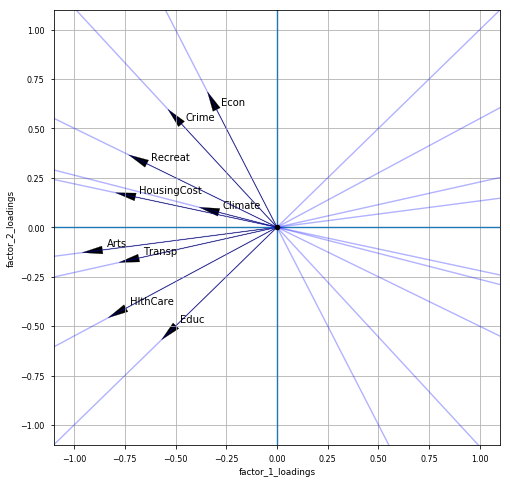

In [13]:
plt.figure(figsize=(8,8))
plt.axis([-1.1,1.1,-1.1,1.1])
factors = ['factor_1_loadings','factor_2_loadings']
plotProjectedBase(plt,factors,factorLoadingsPD,features)

# Factor Rotations
____

In [14]:
from numpy import eye, asarray, dot, sum, diag
from numpy.linalg import svd
def varimax(Phi,gamma=1.0,q=40,tol=1e-6):
    p,k = Phi.shape
    R = eye(k)
    d=0
    for i in range(0,q):
        d_old = d
        Lambda = dot(Phi, R)
        u,s,vh = svd(dot(Phi.T,asarray(Lambda)**3-(gamma/p)*\
                 dot(Lambda,diag(diag(dot(Lambda.T,Lambda))))))
        R = dot(u,vh)
        d = sum(s)
        if d_old!=0 and d/d_old < 1 + tol: break
    return (dot(Phi,R),R)

In [15]:
varimaxMatrix, rotationMatrix = varimax(factorLoadingsPD[['factor_'+str(i+1)+'_loadings'\
                                          for i in range(0,k)]].as_matrix())
varimaxFactorsLoadingsPD = pd.DataFrame(varimaxMatrix,\
                                        columns=['factor_'+str(i+1)+'_varimax'\
                                        for i in range(0,k)],\
                                        index=features)
varimaxFactorsLoadingsPD

,factor_1_varimax,factor_2_varimax,factor_3_varimax
Climate,-0.078636,-0.060877,0.886069
HousingCost,-0.497112,0.422673,0.303412
HlthCare,-0.842429,0.005418,0.112186
Crime,-0.106989,0.610880,0.357531
Transp,-0.676578,0.227015,0.021870
Educ,-0.715037,-0.110768,-0.192851
Arts,-0.783409,0.294918,0.230467
Recreat,-0.368581,0.549464,0.281951
Econ,-0.022343,0.795864,-0.306277


In [16]:
pd.DataFrame(rotationMatrix)

,0,1,2
0,0.843339,-0.458456,-0.280353
1,0.516688,0.835153,0.188557
2,0.147692,-0.303873,0.941195


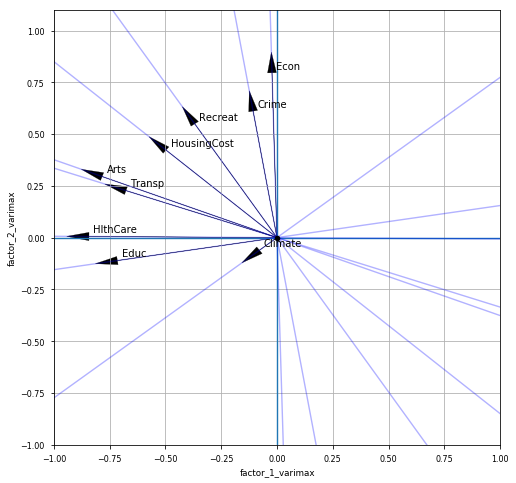

In [17]:
plt.figure(figsize=(8,8))
plt.axis([-1,1,-1,1.1])
varimaxFactors = ['factor_1_varimax','factor_2_varimax']
plotProjectedBase(plt,varimaxFactors,varimaxFactorsLoadingsPD,features)

In [18]:
sqrtLambdaInv = np.diag([1/mt.sqrt(l) for l in eigenValues[0:k]])
LL_T_inv = eigenVectors[:,:k].transpose()
weightMatrix = np.dot(sqrtLambdaInv,LL_T_inv).transpose()
factorScoresDF = sdPlatecRated.rdd.map(lambda r:((r[0]),)+\
                 tuple([float(f) for f in np.dot(rotationMatrix,np.dot(r[1:p+1],weightMatrix))]))\
                 .toDF(idCol+['factorScore'+str(i) for i in range(1,k+1)])
factorScoresDF.limit(5).toPandas()

,City,factorScore1,factorScore2,factorScore3
0,Abilene,0.194956,1.289494,-1.154504
1,Akron,-0.627231,-0.256999,0.982178
2,Albany,0.942021,0.930020,0.119927
3,Albany-Schenectady-Troy,0.365622,-1.840849,-0.790232
4,Albuquerque,-1.322277,-0.473826,0.120342


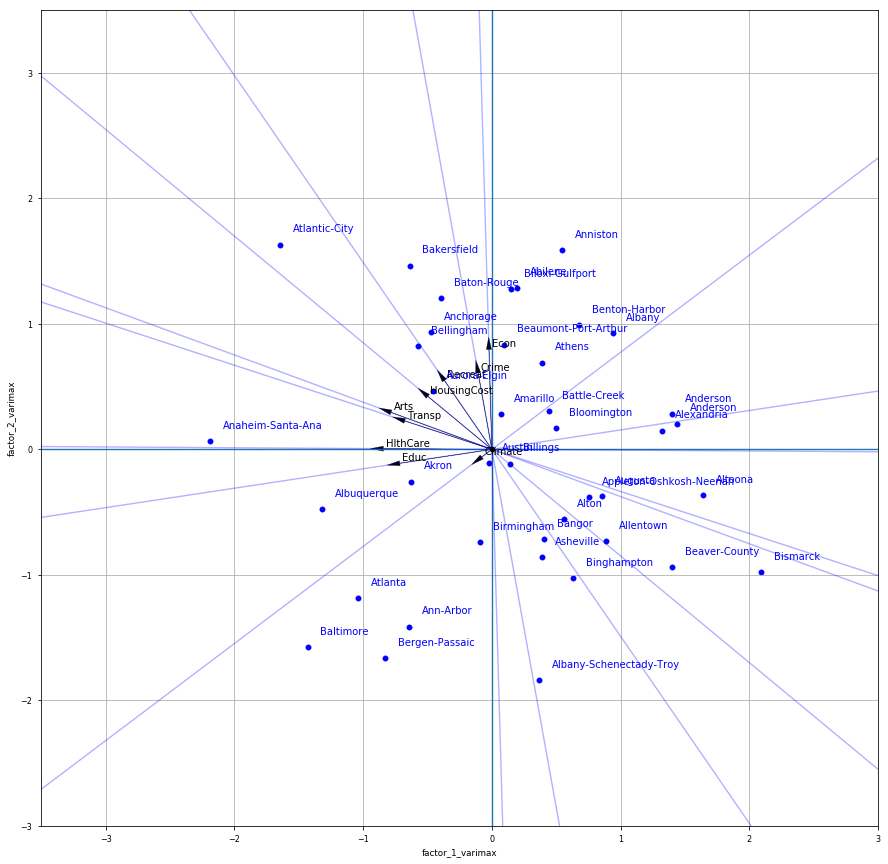

In [19]:
plt.figure(figsize=(15,15))
plt.axis([-3.5,3,-3,3.5])
factors = ['factors_1_loadings','factors_2_loadings']
plotProjectedBase(plt,varimaxFactors,varimaxFactorsLoadingsPD,features)
plt = scatterPlot(plt,factorScoresDF.limit(40),'factorScore1','factorScore2','Blue',labels='City')
plt.show()